<a href="https://colab.research.google.com/github/h4rSHp/BCG-Assignment1/blob/main/Copy_of_ML_assignment_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question 1 : Linear Regression
To check whether you are able to build simple linear regression model from scratch or not.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from numpy.linalg import inv
from matplotlib import pyplot

 
!wget --no-check-certificate https://github.com/adigup390/datasets/raw/main/X.npy -O X.npy
!wget --no-check-certificate https://github.com/adigup390/datasets/raw/main/y.npy -O y.npy

--2021-05-28 06:33:41--  https://github.com/adigup390/datasets/raw/main/X.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/adigup390/datasets/main/X.npy [following]
--2021-05-28 06:33:41--  https://raw.githubusercontent.com/adigup390/datasets/main/X.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 528 [application/octet-stream]
Saving to: ‘X.npy’

X.npy               100%[===================>]     528  --.-KB/s    in 0s      

2021-05-28 06:33:42 (27.4 MB/s) - ‘X.npy’ saved [528/528]

--2021-05-28 06:33:42--  https://github.com/adigup390/datasets/raw/main/y.npy
Resolving github.com (github

In [11]:
def load_data_LR():
  # Implement this function to read the dataset using the path declared in path_X and path_y
  # should return the X and y data
  # use np.load() to load the data google it you will get to know how to do it

  path_X = "X.npy"
  path_y = "y.npy"

  # Write your code here ----------

  X = np.load(path_X)
  y = np.load(path_y)

  # -------------------------------

  return X, y

In [12]:
def get_linear_model(X, y):
  # This should return a proper linear model without bias of type y = XW

  # Write your code here ----------
  
  model = tf.keras.Sequential([tf.keras.layers.Dense(units = 1)])
  model.compile(optimizer = 'sgd', loss = 'mean_squared_error')
  model.fit(X, y, epochs=100)
  
  return model;
  # -------------------------------
  
  # W = np.random.randn(D, out_shape)

  # return W

In [13]:
def MSE(y, y_pred):
  # should return the mean square error between the actual y and predicted y

  # Write your code here ----------
  sum = 0 
  for i,j in zip(y, y_pred):
    sum = sum + (i-j)*(i-j)

  length = len(y_pred)
  error = sum/length
  # -------------------------------

  return error

In [14]:
def train_by_algebra(X, y):
  # should return the trained weight 'W' using the linear algebra method i.e. setting dE/dW = 0
  W = inv(X.T.dot(X)).dot(X.T).dot(y)
  # Write your code here ----------
  # -------------------------------

  return W

In [15]:
def train_by_GD(X, y, epochs, l):
  # should return the trained weight 'W' using the gradient descent for number of iterations equals to epochs
  # should also return error history int the cariable error_hist.shape = (epochs,); error_hist[i] = mean square error after epoch i-1
  # should also print mean square error after each epoch/ iteration
  # lr = "learning rate" i.e. eta
  
  # Write your code here ----------
  W = 0
  n = float(len(X))
  error_hist = []
  # error_hist.reshape = (epochs,)

  for j in range(epochs):
    y_pred = W * X
    D_w = (-2/n) * sum(X * (y - y_pred))
    W = W - l*D_w
    mse = (1/n) * sum(y * y - y_pred * y_pred)
    
    error_hist.append(mse[0])
    

  epochs_list = [*range(1, epochs+1, 1)]
  print(W)
  y_pred = W*X

  pyplot.plot(epochs_list, error_hist, color='r')
  pyplot.xlabel("epoch")
  pyplot.ylabel("Mean Square error")
  pyplot.show()

  pyplot.scatter(X, y, color='r', label = 'y')
  pyplot.plot(X, y_pred, color='b', label = 'y_pred')
  pyplot.xlabel("X")
  pyplot.ylabel("Y and Y_pred")
  pyplot.legend(loc = 'lower right')
  pyplot.show()
  # -------------------------------

  return W
  # return W, error_hist

### Now write a complete code using the function defined above to learn the model for following cases:

##### Learn **W** using linear algebra method and prints mean square error between actual y and predicted y. Use `y_pred = XW`. Also plot y_pred and y on different plots.

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 745.5669
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 334.2440
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 160.3952
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 75.6985
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 38.0084
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 21.2284
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 13.2249
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.8399
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 8.3436
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 7.6227
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - loss: 7.3063
Epoch 12/100
2/2 [==============================] - 0s 5ms/step - loss: 7.1481
Epoch 13/100
2/2 [==============================] -

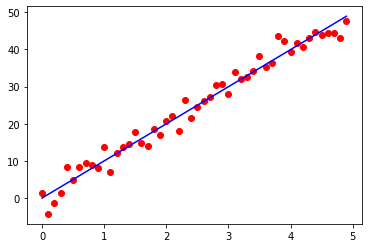

In [16]:
# Write your code here ----------
  
X, y = load_data_LR()

model = get_linear_model(X, y)
# print(x)
# print(y)

W = train_by_algebra(X, y)
print(W)

y_pred = X*W

# print(y_pred)

mse = MSE(y, y_pred)

print(mse)

pyplot.scatter(X, y, color='r')
pyplot.plot(X, y_pred, color='b')
pyplot.show()


# -------------------------------

##### Learn **W** using gradient descent method for following learning rates, `lr = [0.01, 0.001, 0.0001]` for **10 epochs**. Plot **MSE vs epochs** for each of them.  Also plot y_pred and y on different plots.

[8.27463381]


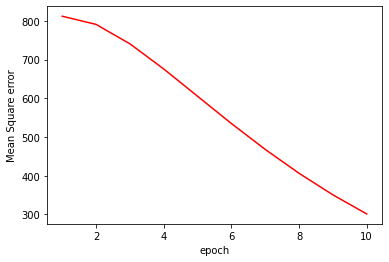

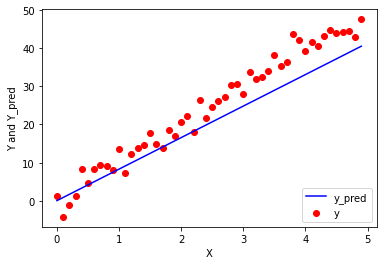

[1.5021967]


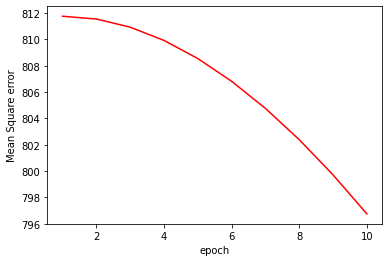

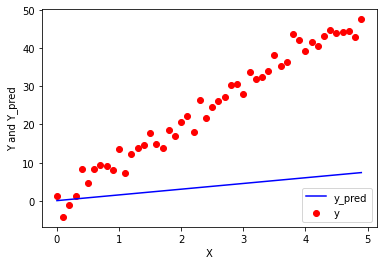

[0.16030701]


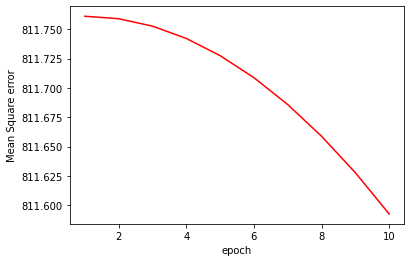

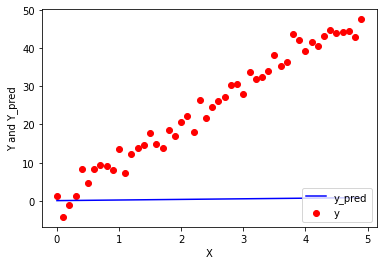

In [17]:
  # Write your code here ----------
  X, y = load_data_LR()
  L = [0.01, 0.001, 0.0001]

  epochs = 10
  # epochs = 1000
  
  for l in L:
    train_by_GD(X, y, epochs, l)

  # -------------------------------

## Question 2: Image Classification in Tensorflow using Deep Learning
To check whether you are able to build a given neural network model in tensorflow or not. First we will build a fully connected NN model second we will build a CNN model.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
def plot_history(history):
  # function to plot accuracy vs epoch

  plt.plot(history.history['accuracy'], label= 'accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_acc')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

In [3]:
def load_data_cifar10_norm():
  # should return the normalised cifar10 dataset by loading it from tensorflow
  # link: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/

  # Write your code here ----------
  (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
  x_train, x_test = x_train / 255.0, x_test / 255.0

  # -------------------------------

  return x_train, y_train, x_test, y_test

### Define a fully connected neural network model with following attributes:

*   Total number of **hidden layers = 4**, all with **relu** activation
*   Number of neurons in **first hidden layer = 7200**
*   Number of neurons in **second hidden layer = 2304**
*   Number of neurons in **third hidden layer = 1024**
*   Number of neurons in **fourth hidden layer = 64**


In [4]:
def build_fc_model(input_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model
  # Write your code here ----------
  model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape = input_shape),
      tf.keras.layers.Dense(7200, activation='relu'), 
      tf.keras.layers.Dense(2304, activation='relu'),
      tf.keras.layers.Dense(1024, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(num_class, activation = 'softmax'),
  ])
  # -------------------------------

  return model

### Define a CNN model with following attribute:

*   Total number of **hidden layer = 4**
*   After every convolutional layer there must be a MaxPoolingLayer of size (2, 2)
*   Total number of convolutional layer = 3, all with **relu** activation.
    *    Number of filters in **first convolutional layer = 32**
    *    Number of filters in **second convolutional layer = 64**
    *    Number of filters in **third convolutional layer = 64**
*   After all convolutional layer flatten the output and use **dense layer of 64 neurons**



In [5]:
def build_cnn_model(input_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model

  # Write your code here ----------
  model = tf.keras.Sequential([
                              tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
                              tf.keras.layers.MaxPooling2D(2, 2),
                              tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = input_shape),
                              tf.keras.layers.MaxPooling2D(2, 2),
                              tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = input_shape),
                              tf.keras.layers.MaxPooling2D(2, 2),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(64, activation = tf.nn.relu),
                              tf.keras.layers.Dense(num_class, activation='softmax'),
    ])
  # -------------------------------

  return model

### Compile and train the fully connected neural network model using the above functions.

170500096/170498071 [==============================] - 4s 0us/step
Epoch 1/10
98/98 [==============================] - 7s 36ms/step - loss: 2.8166 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
98/98 [==============================] - 3s 33ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
98/98 [==============================] - 3s 33ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
98/98 [==============================] - 3s 34ms/step - loss: 2.3026 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
98/98 [==============================] - 3s 34ms/step - loss: 2.3026 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
98/98 [==============================] - 3s 34ms/step - loss: 2.3026 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
98/98 [==============================] - 3s 34ms/step - loss: 2.3026 - accur

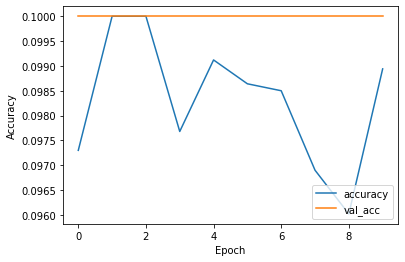

In [6]:
# Write your code here ----------

x_train, y_train, x_test, y_test = load_data_cifar10_norm()

model = build_fc_model()

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# -------------------------------

history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test))

# print(model.metrics_names)

plot_history(history)
model.summary()

### Compile and train the CNN model using the above functions.

Epoch 1/10
98/98 [==============================] - 30s 21ms/step - loss: 1.9305 - accuracy: 0.2916 - val_loss: 1.6491 - val_accuracy: 0.4040
Epoch 2/10
98/98 [==============================] - 2s 17ms/step - loss: 1.5596 - accuracy: 0.4325 - val_loss: 1.4942 - val_accuracy: 0.4579
Epoch 3/10
98/98 [==============================] - 2s 17ms/step - loss: 1.4210 - accuracy: 0.4868 - val_loss: 1.3876 - val_accuracy: 0.5063
Epoch 4/10
98/98 [==============================] - 2s 16ms/step - loss: 1.3412 - accuracy: 0.5205 - val_loss: 1.3091 - val_accuracy: 0.5370
Epoch 5/10
98/98 [==============================] - 2s 17ms/step - loss: 1.2692 - accuracy: 0.5466 - val_loss: 1.2835 - val_accuracy: 0.5450
Epoch 6/10
98/98 [==============================] - 2s 17ms/step - loss: 1.2195 - accuracy: 0.5676 - val_loss: 1.1940 - val_accuracy: 0.5766
Epoch 7/10
98/98 [==============================] - 2s 16ms/step - loss: 1.1699 - accuracy: 0.5863 - val_loss: 1.1663 - val_accuracy: 0.5880
Epoch 8/10
9

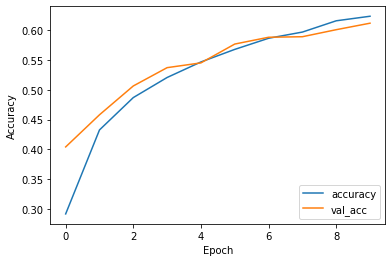

In [7]:
# Write your code here ----------
x_train, y_train, x_test, y_test = load_data_cifar10_norm()

model = build_cnn_model()

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# -------------------------------

history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test))

plot_history(history)
model.summary()

### What do you observe? Compare both the model by looking at their Accuracy vs Epoch plot and total numbers of trainable parameters.

In [8]:
print("As the validation accuracy in fc_model is contant around 100% means it can recognise new images with 100% accuracy but in cnn_model the validation accuracy is increasing and also below 60% which means it will not be able to recognise new images as accurate as fc_model.")

As the validation accuracy in fc_model is contant around 100% means it can recognise new images with 100% accuracy but in cnn_model the validation accuracy is increasing and also below 60% which means it will not be able to recognise new images as accurate as fc_model.
